# Micro-Mortgage Analytics:Predict whether to approve the credit or not
# CRISP-DM





# Business Problem definition

One of the most common problem in Banking Industry is to predict whether the customer would pay back the loan or not and this problem gets complex
when the bank specifically deal with low income category people which has high risk of defalulting.

Micro-credit(Mortgage) has some specific challenges which can be different from conventional credit business:
1) The bank needs to collect various information which could be 100 or more 
2) The bank needs to develop its own credit scoring model for a optimum threshold (varies from bank to bank)
3) Each time credit officer needs to verify manually all the details by visiting his home & Neighbour
4) The time taken to reach in a decision is not competitive as other banks can leverage by taking quicj decision

# Business Goal

To build an effective model  we can predict a particular customer if he/she is eligible for the credit given the loan request

# Project Objective

We will use Machine Learning to classify the most desirable customer and explore various models to check which model is giving better result 
compared to others.


# Data Description:
1) ID: unique identifier for each application.
2) Decision: credit decision taken for the applicant 1=sanction,0=reject
3) Build_Selfcon: Variable to indicate whether applicant seeks a home loan for self-construction or a builder-promoted project
4) Selfcon_code: if Build_Selfcon=’Self Construction’,then Selfcon_code=1;if Build_Selfcon=’builder’,then Selfcon_code=0
5) Tier=city tier where the loan was sought.Tier-1=Major City,Tier-2=Minor City,tier-3=town/village
6) Tier-1:if Tier=’tier-1’,tier_1=1;else tier_1=0
7) Tier_2:if tier=’tier-2’,tier_2=1;else tier_2=0
8) Accommodation_Class:variable to indicate whether applicant resides currently in rented or non-rented premises
9) Accoclass:if accommodation_Class=’Rented’,Accoclass=1,else Accoclass=0
10) Loan_Type:variable to indicate if loan was sought for home loan or home improvement loan
11) Loantype:if loan_type=’home_loan’,loantype=1;else loantype=0
12) Gender:applicant’s Gender
13) Sex:if gender=’male’,sex=1;else sex=0
14) Employment_Type:variable to indicate whether the applicant was salaried or self-employed
15) Etype:if Employment_Type=’Self_employed’,Etype=1;else Etype=0
16) doc_proof_inc:indicates whether the applicant submitted documentary proof of income
17) Docprf:if doc_proof_inc=’Y’,Docprf=1;elseDocprf=0
18) Marital_Status:indicates if the applicant is married or single currently
19) Marstat:if Marital_Status=’Married’,Marstat=1;else Marstat=0
20) Employer_Type:applicant’s employer’s category(business,corporate,government,ind/small business)
21) Emp_type_1:if employer_type=’Business’,emp_type_1=1;else Emp_type_1=0
22) Emp_type_2:if employer_type=’govt’,emp_type_2=1;else emp_type_2=0
23) Emp_type_3:if employer_type=’corporate’,emp_type_3=1;else emp_type_3=0
24) Education_Class:education of the applicant
25) Educlass_2:if education_class=’GRADUATE+’,educlass_2=1;else educlass_2=0
26) Educlass_1=if education_class=’UNDERGRADUATE’,educlass_1=1;else educlass_1=0
27) Mode_of_origin_class:the source from which the application originated
28) Oriclass_1:if mode_of_origin_class=’Reference’,Oriclass_1=1;else Oriclass_1=0
29) Oriclass_2:if mode_of_origin_class=’own database field visit’,oriclass_2=1;else oriclass_2=0
30) eom_25=variable to indicate whether the application was received after the 25th of the month
31) Oldemi_d:variable to indicate if the applicant had old loans
32) Bs_d:variable to indicate if the applicant has bank savings
33) Age:age of the applicant
34) Yrsadd:years in current residential address
35) Yrsjob:years in current job
36) Expen:Monthly expenses of applicant
37) Totinc:Monthly income of the applicant
38) Dispinc:Total monthly income-total monthly expenses
39) Marval:market value of the property for which loan is sought
40) Oldemi:EMI for earlier loans that the applicant pays every month
41) Loanreq:loan amount requested by the applicant
42) Term:term of the loan
43) Dwbpay: down payment by the applicant
44) Banksave:bank saving of applicants
45) Calcemi:EMI calculated for the applicant’s requested loan amount
46) IIR:Calcemi/Monthly total income
47) Gender:Applicant’s gender
48) IAR:Calcemi/monthly disposable income
49) FOIR:(calcemi+oldemi)/total monthly income
50) LTV:total loan requested/market value
51) LVR:total loan requested/property registered value
52) dwnp_prop:Dwnpy/(Dwnpay+Loanreq)
53) mfior_p:((oldemi+calcemi)*100)dispinc
54) dwnp_prop_p:Dwnp_prop*100
55) dispinc_s:dispinc/1000000
56) marval_s:Marval/100000
57) loanreq_s:loanreq/100000
58) banksave_s:Banksave/10000
59) calcemi_s:calcemi/10000
60) oldemi_s:oldemi/10000
61) Tier_2XAccoclass:interaction variable of Tier_2&Accoclass

## Some standard Mortgage ratios:

IIR=equated monthly installments(EMI)/total household income
IAR=equated monthly installments(EMI)/Disposable income
[disposable income=total household income-total expenses]
LTV=total loan requested/market value of property
LVR=total loan requested/property value
[property value is registered value of property at the municipality]
FOIR=(EMI+ongoing loan EMI)/total household income

# Tier classification:

Tier-1 is cities like Bangalore,Kolkata,Mumbai,Chennai etc
Tier-2 is cities like Agra,Indore,Kochi,Amritsar etc.

# Data Source
https://www.wileyindia.com/business-analytics-the-science-of-data-driven-decision-making.html#

# Output Variable
Target is Decision: 1= sanction the credit & 2= reject the credit

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
credit_df=pd.read_csv('C:\data\small credit analysis_Training Data.csv')
credit_df.head()

,ID,Decision,Build_Selfcon,Selfcon_Code,Tier,Tier_1,Tier_2,Accommodation_Class,AccoClass,Loan_Type,...,dwnp_prop,mfoir_p,dwnp_prop_p,DispInc_s,MarVal_s,LoanReq_s,LoanReq_s.1,CalcEmi_s,OldEmi_s,Tier2XAccoClass
0,AJM-39R8-519413,0,Self Contruction,1,3,0,0,Non_Rented,0,Home_Loan,...,0.600000,30.663042,60.000000,3.7156,0.500000,2.0,0.0,0.408716,0.7306,0
1,AJM-3A3Z-876970,0,Self Contruction,1,3,0,0,Non_Rented,0,Home_Loan,...,0.288889,58.250000,28.888889,1.2628,0.450704,3.2,0.0,0.492481,0.2431,0
2,AJM-7427-952085,1,Self Contruction,1,3,0,0,Non_Rented,0,Home_Improvement,...,0.526963,56.000046,52.696310,2.0916,2.777778,5.0,0.0,1.171297,0.0000,0
3,AJM-8ZTZ-979040,1,Self Contruction,1,3,0,0,Rented,1,Home_Loan,...,0.399940,52.999656,39.993999,2.9038,1.785714,10.0,0.0,1.539004,0.0000,0
4,AJM-9SP2-614810,1,Self Contruction,1,3,0,0,Non_Rented,0,Home_Loan,...,0.131190,57.000148,13.119027,2.7000,1.960784,10.0,0.0,1.539004,0.0000,0


In [22]:
print(credit_df.shape)
credit_df.columns

(1570, 60)


Index(['ID', 'Decision', 'Build_Selfcon', 'Selfcon_Code', 'Tier', 'Tier_1',
       'Tier_2', 'Accommodation_Class', 'AccoClass', 'Loan_Type', 'LoanType',
       'Gender', 'Sex', 'Employment_Type', 'Etype', 'Doc_Proof_Inc', 'Doc_pf',
       'Marital_Status', 'Marstat', 'Employer_Type', 'Emp_Type_1',
       'Emp_Type_2', 'Emp_Type_3', 'Education_Class', 'Educlass_2',
       'Educlass_1', 'Mode_of_origin_class', 'Oriclass_1', 'Oriclass_2',
       'eom_25', 'OldEmi_d', 'BankSave_d', 'Age', 'YrsAdd', 'YrsJob', 'Expen',
       'TotInc', 'DispInc', 'MarVal', 'OldEmi', 'LoanReq', 'Term', 'Dwnpay',
       'BankSave', 'CalcEmi', 'IIR', 'IAR', 'FOIR', 'LTV', 'LVR', 'dwnp_prop',
       'mfoir_p', 'dwnp_prop_p', 'DispInc_s', 'MarVal_s', 'LoanReq_s',
       'LoanReq_s.1', 'CalcEmi_s', 'OldEmi_s', 'Tier2XAccoClass'],
      dtype='object')

In [23]:
credit_df.drop(['ID'],axis=1,inplace=True)   # ID column is of no importance
print(credit_df.shape)

(1570, 59)


In [24]:
credit_df.head()

,Decision,Build_Selfcon,Selfcon_Code,Tier,Tier_1,Tier_2,Accommodation_Class,AccoClass,Loan_Type,LoanType,...,dwnp_prop,mfoir_p,dwnp_prop_p,DispInc_s,MarVal_s,LoanReq_s,LoanReq_s.1,CalcEmi_s,OldEmi_s,Tier2XAccoClass
0,0,Self Contruction,1,3,0,0,Non_Rented,0,Home_Loan,1,...,0.600000,30.663042,60.000000,3.7156,0.500000,2.0,0.0,0.408716,0.7306,0
1,0,Self Contruction,1,3,0,0,Non_Rented,0,Home_Loan,1,...,0.288889,58.250000,28.888889,1.2628,0.450704,3.2,0.0,0.492481,0.2431,0
2,1,Self Contruction,1,3,0,0,Non_Rented,0,Home_Improvement,0,...,0.526963,56.000046,52.696310,2.0916,2.777778,5.0,0.0,1.171297,0.0000,0
3,1,Self Contruction,1,3,0,0,Rented,1,Home_Loan,1,...,0.399940,52.999656,39.993999,2.9038,1.785714,10.0,0.0,1.539004,0.0000,0
4,1,Self Contruction,1,3,0,0,Non_Rented,0,Home_Loan,1,...,0.131190,57.000148,13.119027,2.7000,1.960784,10.0,0.0,1.539004,0.0000,0


# getting the summary

In [25]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Decision              1570 non-null   int64  
 1   Build_Selfcon         1570 non-null   object 
 2   Selfcon_Code          1570 non-null   int64  
 3   Tier                  1570 non-null   int64  
 4   Tier_1                1570 non-null   int64  
 5   Tier_2                1570 non-null   int64  
 6   Accommodation_Class   1570 non-null   object 
 7   AccoClass             1570 non-null   int64  
 8   Loan_Type             1570 non-null   object 
 9   LoanType              1570 non-null   int64  
 10  Gender                1570 non-null   object 
 11  Sex                   1570 non-null   int64  
 12  Employment_Type       1570 non-null   object 
 13  Etype                 1570 non-null   int64  
 14  Doc_Proof_Inc         1570 non-null   object 
 15  Doc_pf               

In [26]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Decision,1570.0,7.993631e-01,0.400605,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Selfcon_Code,1570.0,9.624204e-01,0.190238,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Tier,1570.0,1.996815e+00,0.792325,1.000000,1.000000,2.000000e+00,3.000000e+00,3.000000e+00
Tier_1,1570.0,3.152866e-01,0.464778,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
Tier_2,1570.0,3.726115e-01,0.483654,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
AccoClass,1570.0,4.904459e-01,0.500068,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
LoanType,1570.0,9.324841e-01,0.250993,0.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Sex,1570.0,8.789809e-02,0.283237,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00
Etype,1570.0,5.369427e-01,0.498792,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00
Doc_pf,1570.0,2.726115e-01,0.445445,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00


# cleaning the data

In [27]:
credit_df.isnull().sum()

Decision                0
Build_Selfcon           0
Selfcon_Code            0
Tier                    0
Tier_1                  0
Tier_2                  0
Accommodation_Class     0
AccoClass               0
Loan_Type               0
LoanType                0
Gender                  0
Sex                     0
Employment_Type         0
Etype                   0
Doc_Proof_Inc           0
Doc_pf                  0
Marital_Status          0
Marstat                 0
Employer_Type           0
Emp_Type_1              0
Emp_Type_2              0
Emp_Type_3              0
Education_Class         0
Educlass_2              0
Educlass_1              0
Mode_of_origin_class    0
Oriclass_1              0
Oriclass_2              0
eom_25                  0
OldEmi_d                0
BankSave_d              0
Age                     0
YrsAdd                  0
YrsJob                  0
Expen                   0
TotInc                  0
DispInc                 0
MarVal                  0
OldEmi      

In [28]:
credit_df.nunique()

Decision                   2
Build_Selfcon              2
Selfcon_Code               2
Tier                       3
Tier_1                     2
Tier_2                     2
Accommodation_Class        2
AccoClass                  2
Loan_Type                  2
LoanType                   2
Gender                     2
Sex                        2
Employment_Type            2
Etype                      2
Doc_Proof_Inc              2
Doc_pf                     2
Marital_Status             2
Marstat                    2
Employer_Type              4
Emp_Type_1                 2
Emp_Type_2                 2
Emp_Type_3                 2
Education_Class            3
Educlass_2                 2
Educlass_1                 2
Mode_of_origin_class       3
Oriclass_1                 2
Oriclass_2                 2
eom_25                     2
OldEmi_d                   2
BankSave_d                 2
Age                       42
YrsAdd                    51
YrsJob                    41
Expen         

In [29]:
credit_df.columns

Index(['Decision', 'Build_Selfcon', 'Selfcon_Code', 'Tier', 'Tier_1', 'Tier_2',
       'Accommodation_Class', 'AccoClass', 'Loan_Type', 'LoanType', 'Gender',
       'Sex', 'Employment_Type', 'Etype', 'Doc_Proof_Inc', 'Doc_pf',
       'Marital_Status', 'Marstat', 'Employer_Type', 'Emp_Type_1',
       'Emp_Type_2', 'Emp_Type_3', 'Education_Class', 'Educlass_2',
       'Educlass_1', 'Mode_of_origin_class', 'Oriclass_1', 'Oriclass_2',
       'eom_25', 'OldEmi_d', 'BankSave_d', 'Age', 'YrsAdd', 'YrsJob', 'Expen',
       'TotInc', 'DispInc', 'MarVal', 'OldEmi', 'LoanReq', 'Term', 'Dwnpay',
       'BankSave', 'CalcEmi', 'IIR', 'IAR', 'FOIR', 'LTV', 'LVR', 'dwnp_prop',
       'mfoir_p', 'dwnp_prop_p', 'DispInc_s', 'MarVal_s', 'LoanReq_s',
       'LoanReq_s.1', 'CalcEmi_s', 'OldEmi_s', 'Tier2XAccoClass'],
      dtype='object')

In [30]:
credit_df['Build_Selfcon']=credit_df['Build_Selfcon'].astype('category')

In [31]:
credit_df['Accommodation_Class']=credit_df['Accommodation_Class'].astype('category')

In [32]:
credit_df['Loan_Type']=credit_df['Loan_Type'].astype('category')


In [33]:
credit_df['Gender']=credit_df['Gender'].astype('category')


In [34]:
credit_df['Employment_Type']=credit_df['Employment_Type'].astype('category')


In [35]:
credit_df['Marital_Status']=credit_df['Marital_Status'].astype('category')


In [36]:
credit_df['Employer_Type']=credit_df['Employer_Type'].astype('category')

In [37]:
credit_df['Education_Class']=credit_df['Education_Class'].astype('category')

In [38]:
credit_df['Mode_of_origin_class']=credit_df['Mode_of_origin_class'].astype('category')


In [39]:
credit_df['Decision'] = credit_df['Decision'].astype('category') # as Decision is our target variable

In [44]:
result4 = credit_df["Gender"].value_counts()
print(result4)
total = credit_df["Gender"].count()
yes = result4.values[1]
Gender_pct = (yes/total)*100
print(round(Gender_pct,2),"%")

Female    1432
Male       138
Name: Gender, dtype: int64
8.79 %


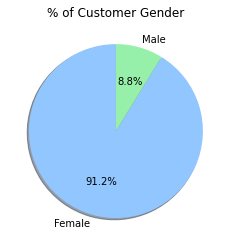

In [45]:
plt.style.use("seaborn-pastel")
plt.pie(result4.values, labels = result4.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title("% of Customer Gender")
plt.show()

In [46]:
result5 = credit_df["Build_Selfcon"].value_counts()
print(result5)
total = credit_df["Build_Selfcon"].count()
yes = result5.values[1]
Build_Selfcon_pct = (yes/total)*100
print(round(Build_Selfcon_pct,2),"%")

Self Contruction    1511
Builder               59
Name: Build_Selfcon, dtype: int64
3.76 %


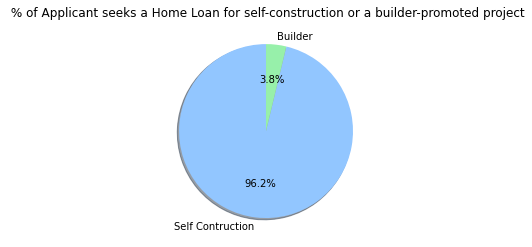

In [47]:
plt.pie(result5.values, labels = result5.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of Applicant seeks a Home Loan for self-construction or a builder-promoted project")
plt.show()

In [48]:
result7 = credit_df["Accommodation_Class"].value_counts()
print(result7)
total = credit_df["Accommodation_Class"].count()
yes = result5.values[1]
Accommodation_Class = (yes/total)*100
print(round(Accommodation_Class,2),"%")

Non_Rented    800
Rented        770
Name: Accommodation_Class, dtype: int64
3.76 %


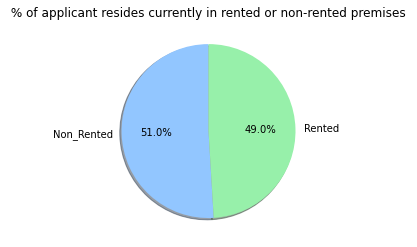

In [49]:
plt.pie(result7.values, labels = result7.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of applicant resides currently in rented or non-rented premises ")
plt.show()

In [50]:
result8 = credit_df["Loan_Type"].value_counts()
print(result8)
total = credit_df["Loan_Type"].count()
yes = result8.values[1]
Loan_Type = (yes/total)*100
print(round(Loan_Type,2),"%")

Home_Loan           1464
Home_Improvement     106
Name: Loan_Type, dtype: int64
6.75 %


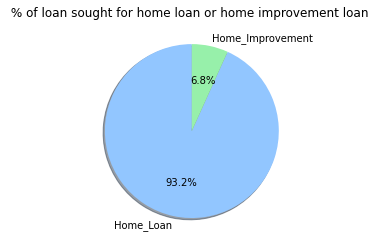

In [51]:
plt.pie(result8.values, labels = result8.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of loan sought for home loan or home improvement loan  ")
plt.show()

In [52]:
result9 = credit_df["Employer_Type"].value_counts()
print(result9)
total = credit_df["Employer_Type"].count()
yes = result9.values[1]
Employer_Type = (yes/total)*100
print(round(Employer_Type,2),"%")

Business        799
Ind/SmallBus    354
Corporate       289
Govt            128
Name: Employer_Type, dtype: int64
22.55 %


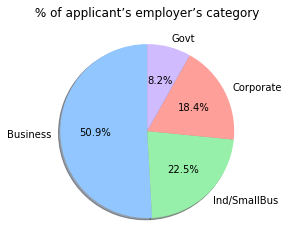

In [53]:
plt.pie(result9.values, labels = result9.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of applicant’s employer’s category ")
plt.show()

In [54]:
result2 = credit_df["Education_Class"].value_counts()
print(result2)
total = credit_df["Education_Class"].count()
yes = result2.values[1]
Education_Class = (yes/total)*100
print(round(Education_Class,2),"%")

U10              947
GRADUATE+        357
UNDERGRADUATE    266
Name: Education_Class, dtype: int64
22.74 %


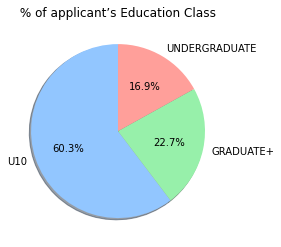

In [55]:
plt.pie(result2.values, labels = result2.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of applicant’s Education Class ")
plt.show()

In [56]:
result3 = credit_df["Mode_of_origin_class"].value_counts()
print(result3)
total = credit_df["Mode_of_origin_class"].count()
yes = result3.values[1]
Mode_of_origin_class = (yes/total)*100
print(round(Mode_of_origin_class,2),"%")

Reference                   1248
Others                       175
Own database field visit     147
Name: Mode_of_origin_class, dtype: int64
11.15 %


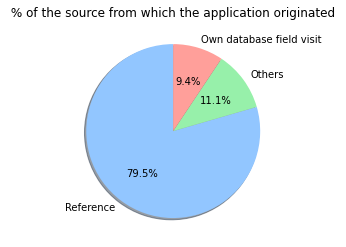

In [57]:
plt.pie(result3.values, labels = result3.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of the source from which the application originated ")
plt.show()

In [58]:
result10 = credit_df["Marital_Status"].value_counts()
print(result10)
total = credit_df["Marital_Status"].count()
yes = result10.values[1]
Marital_Status = (yes/total)*100
print(round(Marital_Status,2),"%")

Married      1416
Unmarried     154
Name: Marital_Status, dtype: int64
9.81 %


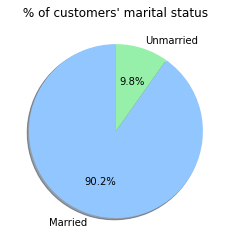

In [59]:
plt.pie(result10.values, labels = result10.index,shadow = True, startangle = 90, autopct = "%1.1f%%")
plt.title(" % of customers' marital status ")
plt.show()

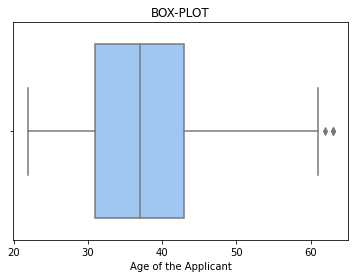

In [60]:
import seaborn as sns
sns.boxplot(credit_df['Age'])
plt.title("BOX-PLOT")
plt.xlabel("Age of the Applicant")
plt.show()

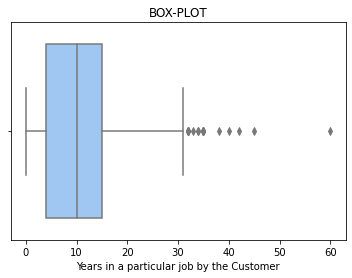

In [61]:
sns.boxplot(credit_df['YrsJob'])
plt.title("BOX-PLOT")
plt.xlabel("Years in a particular job by the Customer")
plt.show()

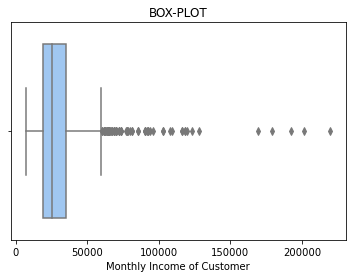

In [62]:
sns.boxplot(credit_df['TotInc'])
plt.title("BOX-PLOT")
plt.xlabel("Monthly Income of Customer")
plt.show()

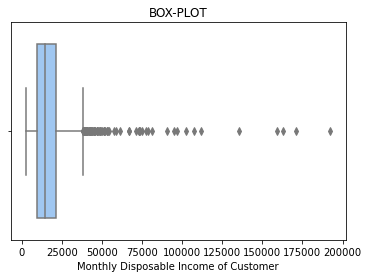

In [63]:
sns.boxplot(credit_df['DispInc'])
plt.title("BOX-PLOT")
plt.xlabel("Monthly Disposable Income of Customer")
plt.show()

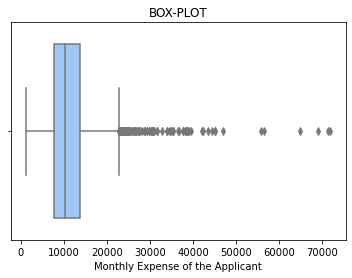

In [64]:
sns.boxplot(credit_df['Expen'])
plt.title("BOX-PLOT")
plt.xlabel("Monthly Expense of the Applicant")
plt.show()

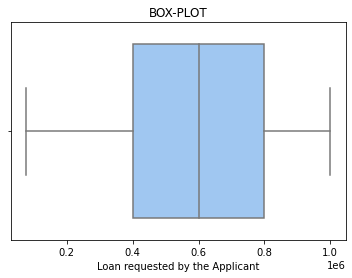

In [65]:
sns.boxplot(credit_df['LoanReq'])
plt.title("BOX-PLOT")
plt.xlabel("Loan requested by the Applicant")
plt.show()

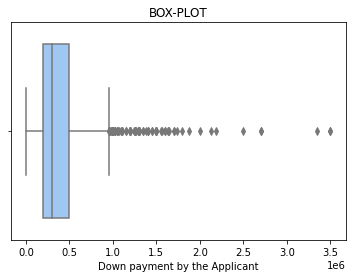

In [66]:
sns.boxplot(credit_df['Dwnpay'])
plt.title("BOX-PLOT")
plt.xlabel("Down payment by the Applicant")
plt.show()

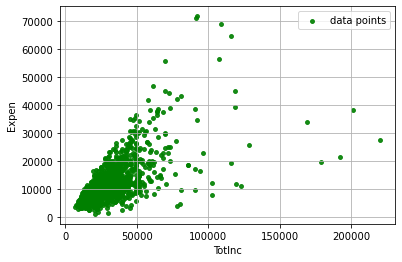

In [67]:
credit_df.plot.scatter(x='TotInc',y='Expen',label='data points',alpha=0.9,color='green',s=15)  
plt.grid(True)

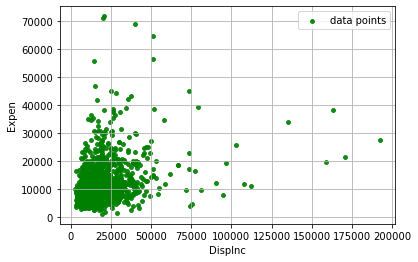

In [68]:
credit_df.plot.scatter(x='DispInc',y='Expen',label='data points',alpha=0.9,color='green',s=15) 
plt.grid(True)

In [69]:
model_data = pd.DataFrame(credit_df)

In [70]:
print(credit_df.columns)
print(model_data.shape)

Index(['Decision', 'Build_Selfcon', 'Selfcon_Code', 'Tier', 'Tier_1', 'Tier_2',
       'Accommodation_Class', 'AccoClass', 'Loan_Type', 'LoanType', 'Gender',
       'Sex', 'Employment_Type', 'Etype', 'Doc_Proof_Inc', 'Doc_pf',
       'Marital_Status', 'Marstat', 'Employer_Type', 'Emp_Type_1',
       'Emp_Type_2', 'Emp_Type_3', 'Education_Class', 'Educlass_2',
       'Educlass_1', 'Mode_of_origin_class', 'Oriclass_1', 'Oriclass_2',
       'eom_25', 'OldEmi_d', 'BankSave_d', 'Age', 'YrsAdd', 'YrsJob', 'Expen',
       'TotInc', 'DispInc', 'MarVal', 'OldEmi', 'LoanReq', 'Term', 'Dwnpay',
       'BankSave', 'CalcEmi', 'IIR', 'IAR', 'FOIR', 'LTV', 'LVR', 'dwnp_prop',
       'mfoir_p', 'dwnp_prop_p', 'DispInc_s', 'MarVal_s', 'LoanReq_s',
       'LoanReq_s.1', 'CalcEmi_s', 'OldEmi_s', 'Tier2XAccoClass'],
      dtype='object')
(1570, 59)


# Dealing with Categorical Variables

In [71]:
# replace some categorical values which has been replaced by dummy variables in the dataset itself
credit_df=credit_df.drop(['Build_Selfcon','Accommodation_Class','Loan_Type','Gender','Employment_Type','Doc_Proof_Inc','Marital_Status','Employer_Type','Education_Class','Mode_of_origin_class'],axis=1)
credit_df.head()

,Decision,Selfcon_Code,Tier,Tier_1,Tier_2,AccoClass,LoanType,Sex,Etype,Doc_pf,...,dwnp_prop,mfoir_p,dwnp_prop_p,DispInc_s,MarVal_s,LoanReq_s,LoanReq_s.1,CalcEmi_s,OldEmi_s,Tier2XAccoClass
0,0,1,3,0,0,0,1,0,1,0,...,0.600000,30.663042,60.000000,3.7156,0.500000,2.0,0.0,0.408716,0.7306,0
1,0,1,3,0,0,0,1,0,0,1,...,0.288889,58.250000,28.888889,1.2628,0.450704,3.2,0.0,0.492481,0.2431,0
2,1,1,3,0,0,0,0,0,1,1,...,0.526963,56.000046,52.696310,2.0916,2.777778,5.0,0.0,1.171297,0.0000,0
3,1,1,3,0,0,1,1,0,1,1,...,0.399940,52.999656,39.993999,2.9038,1.785714,10.0,0.0,1.539004,0.0000,0
4,1,1,3,0,0,0,1,0,1,1,...,0.131190,57.000148,13.119027,2.7000,1.960784,10.0,0.0,1.539004,0.0000,0


In [72]:
credit_df.shape

(1570, 49)

# Change the data type

In [73]:
target = credit_df['Decision']
features = credit_df.drop(columns=['Decision'], axis=1)

In [74]:
print(np.bincount(target))

[ 315 1255]


# create the training and testing data set
splitting data into 70% training and 30% test data

In [75]:
y = target[:]
x = features[:]


from sklearn.model_selection import train_test_split as TTS

x_train, x_valid, y_train, y_valid = TTS(x, y, train_size=0.7)

In [76]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_valid))

Labels counts in y: [ 315 1255]
Labels counts in y_train: [229 870]
Labels counts in y_test: [ 86 385]


In [77]:
x_train, x_valid, y_train, y_valid = TTS(x, y, train_size=0.7, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_valid))

Labels counts in y: [ 315 1255]
Labels counts in y_train: [221 878]
Labels counts in y_test: [ 94 377]


# Run the Decsison Tree Algorithm

In [78]:
#import required packages
from sklearn.tree import DecisionTreeClassifier as DTC

model=DTC()

In [79]:
model.fit(x_train, y_train)  #fit the model

DecisionTreeClassifier()

In [80]:
y_pred = model.predict(x_valid) #make prediction on validation set

In [81]:
print(y_pred[0:40])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 0 1 1]


In [82]:
print('Misclassified samples: %d' % (y_valid != y_pred).sum())

Misclassified samples: 108


In [83]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score, recall_score

              precision    recall  f1-score   support

           0       0.44      0.50      0.47        94
           1       0.87      0.84      0.85       377

    accuracy                           0.77       471
   macro avg       0.65      0.67      0.66       471
weighted avg       0.78      0.77      0.78       471



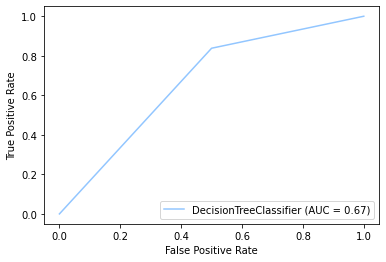

In [84]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_valid,y_pred))
metrics.plot_roc_curve(model, x_valid, y_valid)

In [86]:
print("Confusion Matrix: ")
print(confusion_matrix(y_valid, y_pred)) 

Confusion Matrix: 
[[ 47  47]
 [ 61 316]]


In [87]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       878

    accuracy                           1.00      1099
   macro avg       1.00      1.00      1.00      1099
weighted avg       1.00      1.00      1.00      1099



# Cross-Validation


In [88]:
model = DTC()

from sklearn.model_selection import cross_validate as RCV

cv_results = RCV(model, x,y,
                scoring = ('accuracy','f1','precision','recall'),
                cv=5, return_train_score = True)

In [89]:
print("Metrics",sorted(cv_results.keys()))
print("Training Results",cv_results['train_accuracy'].mean()*100)
print("Validation Results",cv_results['test_accuracy'])
print("Validation Results",cv_results['test_accuracy'].mean()*100)

Metrics ['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'train_accuracy', 'train_f1', 'train_precision', 'train_recall']
Training Results 100.0
Validation Results [0.74522293 0.77707006 0.7611465  0.75159236 0.78343949]
Validation Results 76.36942675159236


In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
# Five-fold cross-validation of the full decision tree classifier
model = DTC()

scores = cross_val_score(model, x, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.742', '0.796', '0.774', '0.768', '0.793']
Accuracy: 0.775 (+/- 0.039)
Accuracy: 0.775 (+/- 0.020)


In [92]:
# Five-fold cross-validation of the full decision tree classifier
model = DTC(criterion='gini')

scores = cross_val_score(model, x, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.710', '0.774', '0.752', '0.748', '0.815']
Accuracy: 0.760 (+/- 0.069)
Accuracy: 0.760 (+/- 0.034)


In [93]:
# Five-fold cross-validation of the full decision tree classifier
model = DTC(criterion='entropy')

scores = cross_val_score(model, x, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.783', '0.780', '0.736', '0.799', '0.809']
Accuracy: 0.782 (+/- 0.050)
Accuracy: 0.782 (+/- 0.025)


In [94]:
# Five-fold cross-validation of the full decision tree classifier
model = DTC(criterion='entropy',max_depth=5)

scores = cross_val_score(model, x, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.799', '0.847', '0.822', '0.850', '0.844']
Accuracy: 0.832 (+/- 0.039)
Accuracy: 0.832 (+/- 0.019)


In [95]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Decision              1570 non-null   category
 1   Build_Selfcon         1570 non-null   category
 2   Selfcon_Code          1570 non-null   int64   
 3   Tier                  1570 non-null   int64   
 4   Tier_1                1570 non-null   int64   
 5   Tier_2                1570 non-null   int64   
 6   Accommodation_Class   1570 non-null   category
 7   AccoClass             1570 non-null   int64   
 8   Loan_Type             1570 non-null   category
 9   LoanType              1570 non-null   int64   
 10  Gender                1570 non-null   category
 11  Sex                   1570 non-null   int64   
 12  Employment_Type       1570 non-null   category
 13  Etype                 1570 non-null   int64   
 14  Doc_Proof_Inc         1570 non-null   object  
 15  Doc_

# Plotting the Values

In [96]:
from sklearn import tree
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [97]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_36 <= 80.50
|   |--- feature_35 <= 51.00
|   |   |--- feature_39 <= 60.00
|   |   |   |--- feature_30 <= 197950.00
|   |   |   |   |--- feature_22 <= 11.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_22 >  11.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_30 >  197950.00
|   |   |   |   |--- feature_23 <= 5990.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_23 >  5990.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_39 >  60.00
|   |   |   |--- feature_39 <= 69.98
|   |   |   |   |--- feature_35 <= 31.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_35 >  31.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_39 >  69.98
|   |   |   |   |--- feature_30 <= 310537.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_30 >  310537.50
|   |   |   |   |   |--- class: 1
|   |--- feature_35 >  51.00
|   |   |--- feature_37 <= 1.00
|   |   |   |--- class: 1
|   |   |--- feature_37 >

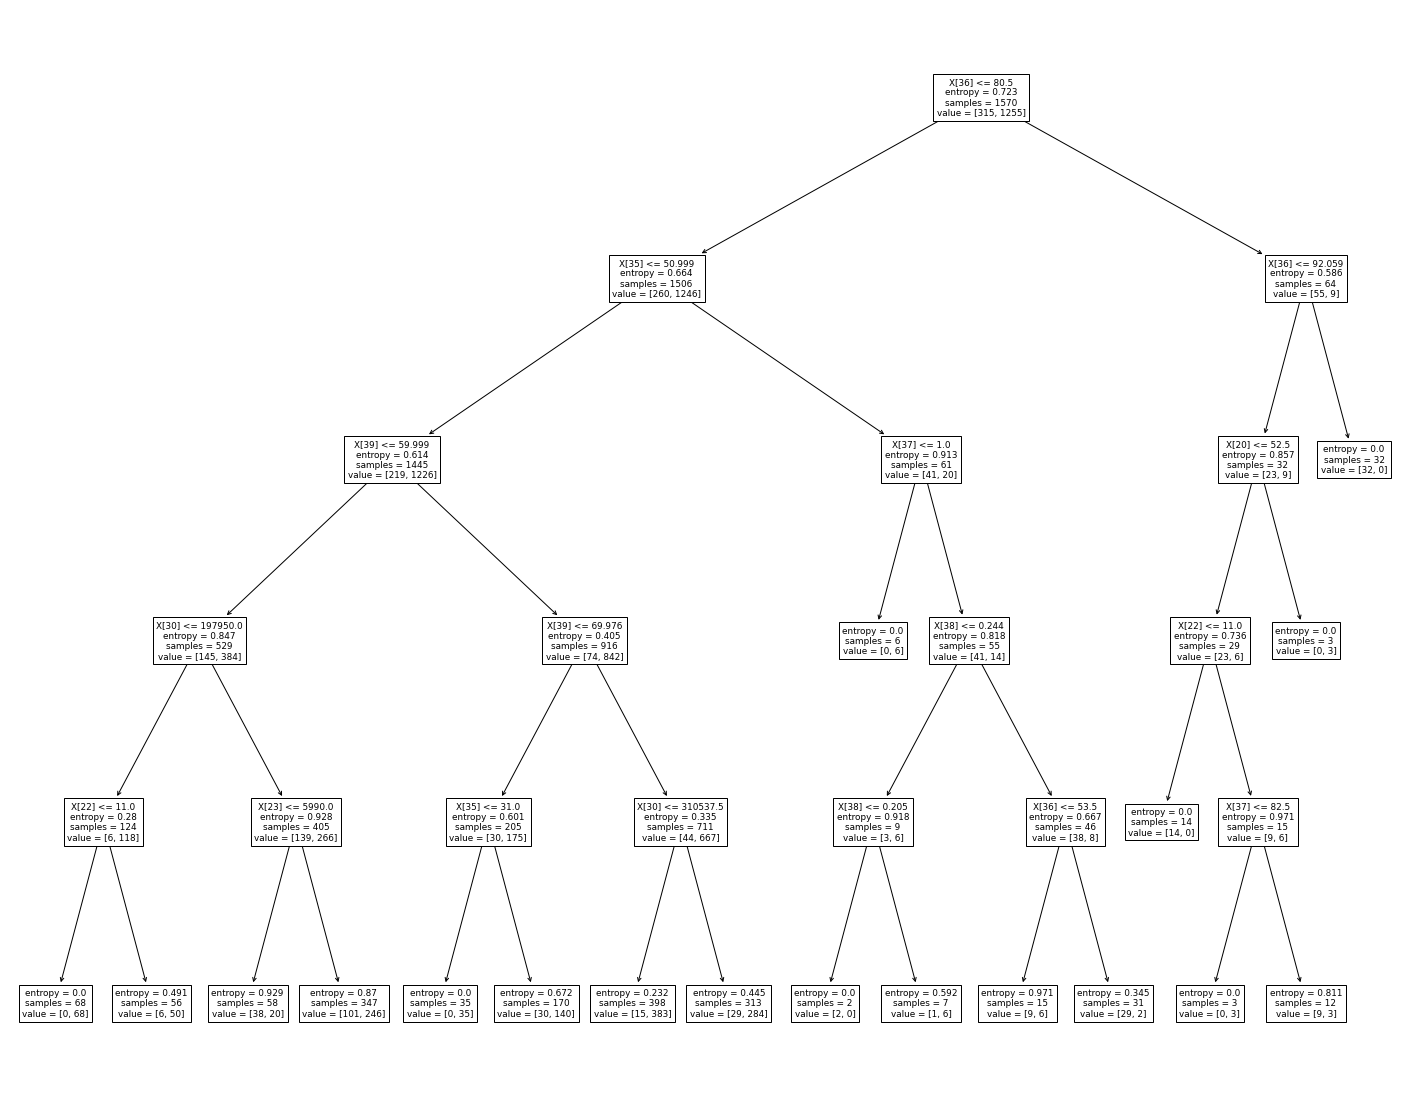

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))

dTree = tree.plot_tree(model)


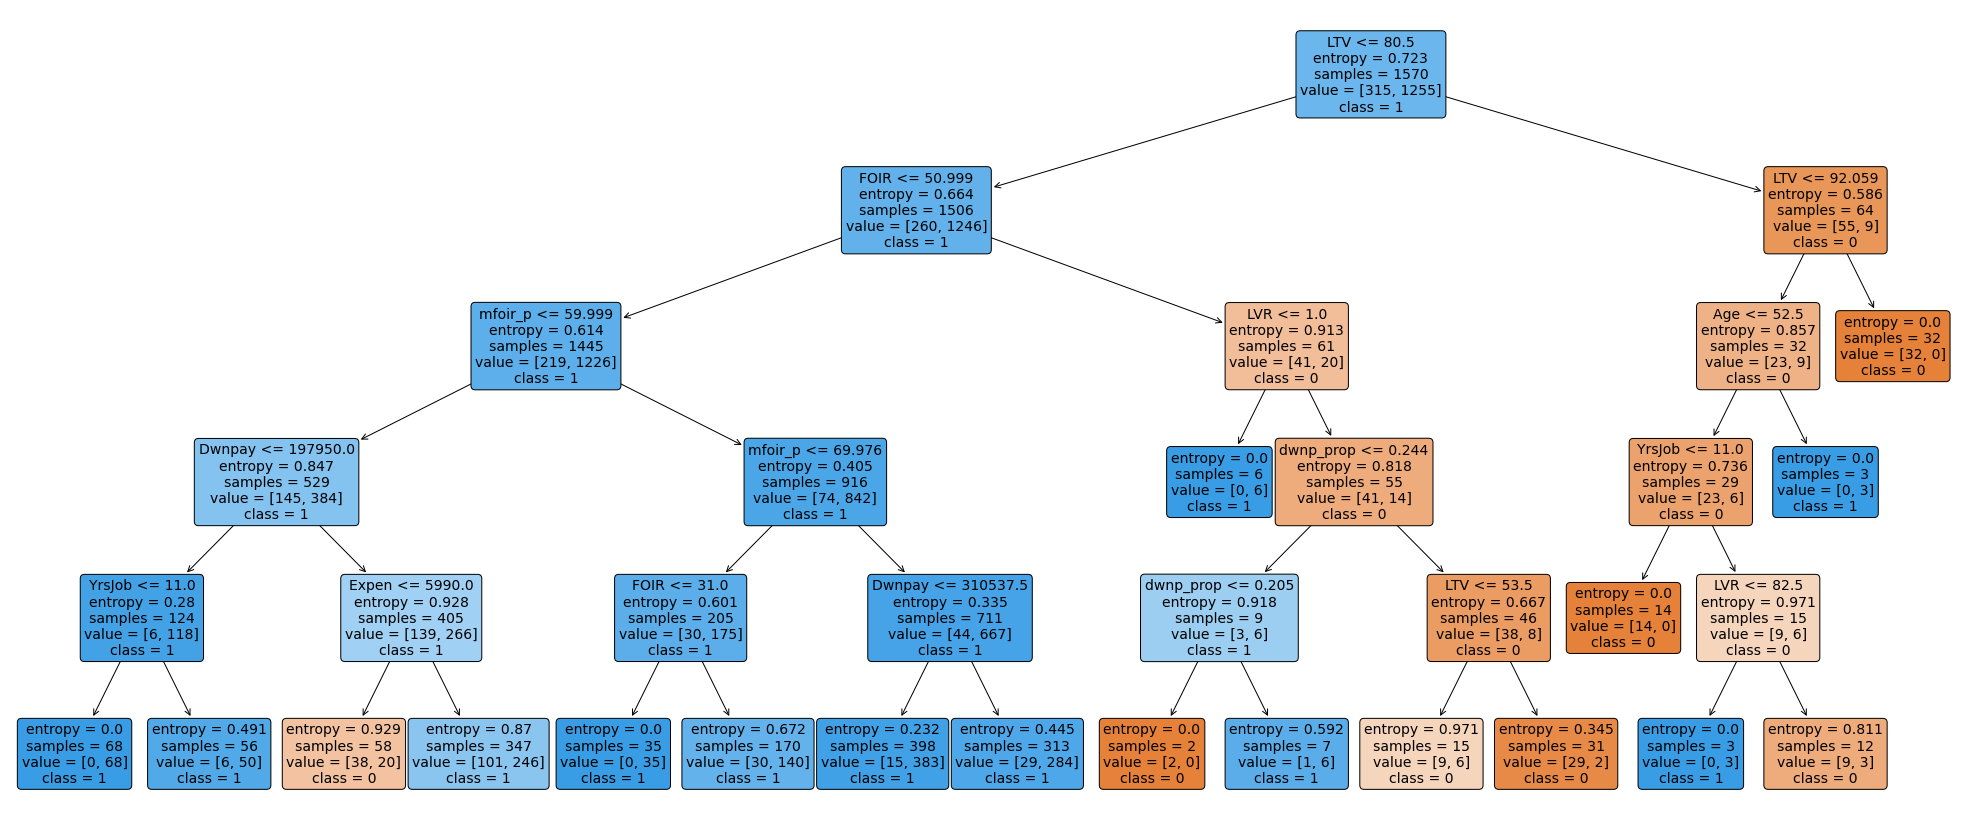

In [99]:
plt.figure(figsize=(35,15))

dTree = tree.plot_tree(model, 
              feature_names=list(features), 
              class_names=('0','1'),
              filled=True, 
              rounded=True, 
              fontsize=14)

In [100]:
model = DTC(criterion='gini',min_samples_leaf=10)
model.fit(x,y)

DecisionTreeClassifier(min_samples_leaf=10)

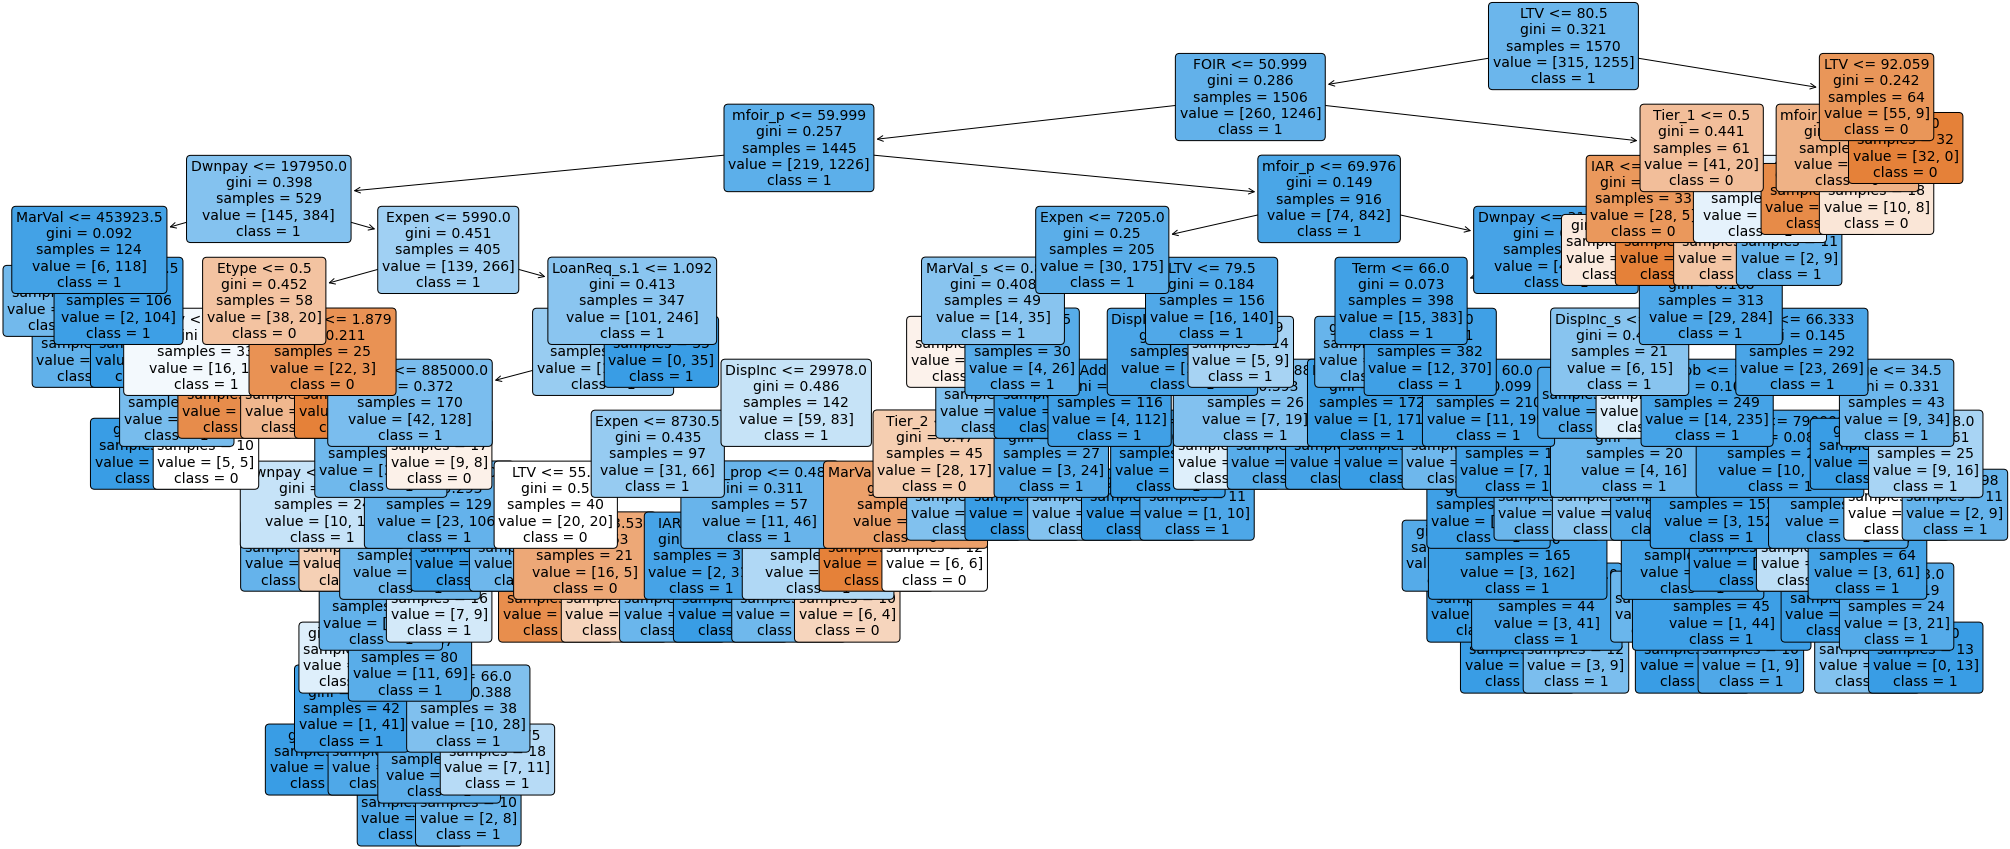

In [101]:
plt.figure(figsize=(35,15))

dTree = tree.plot_tree(model, 
              feature_names=list(features), 
              class_names=('0','1'),
              filled=True, 
              rounded=True, 
              fontsize=14)

# RandomForest Algorithm

In [102]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_valid)

In [103]:
print("Confusion Matrix: ")
print(confusion_matrix(y_valid, y_pred)) 
      
print ("Accuracy : ")
print(accuracy_score(y_valid,y_pred)*100) 
      
print("Classification Report : ")
print(classification_report(y_valid, y_pred))

Confusion Matrix: 
[[ 36  58]
 [ 12 365]]
Accuracy : 
85.13800424628451
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.38      0.51        94
           1       0.86      0.97      0.91       377

    accuracy                           0.85       471
   macro avg       0.81      0.68      0.71       471
weighted avg       0.84      0.85      0.83       471



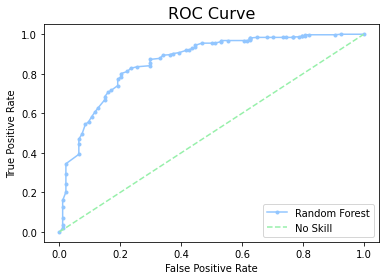

AUC ROC score is : 0.6755742423387323


In [104]:
RF_probs = RF.predict_proba(x_valid)[:,1]
NS_probs = [0 for _ in range(len(y_valid))]
rf_fpr, rf_tpr, _ = roc_curve(y_valid, RF_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_valid, NS_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_valid,y_pred))

# Logistic Regression

In [105]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_valid)

In [106]:
print("Confusion Matrix: ")
print(confusion_matrix(y_valid, y_pred)) 
      
print ("Accuracy : ")
print(accuracy_score(y_valid,y_pred)*100) 
      
print("Classification Report : ")
print(classification_report(y_valid, y_pred))

Confusion Matrix: 
[[ 19  75]
 [ 17 360]]
Accuracy : 
80.46709129511677
Classification Report : 
              precision    recall  f1-score   support

           0       0.53      0.20      0.29        94
           1       0.83      0.95      0.89       377

    accuracy                           0.80       471
   macro avg       0.68      0.58      0.59       471
weighted avg       0.77      0.80      0.77       471



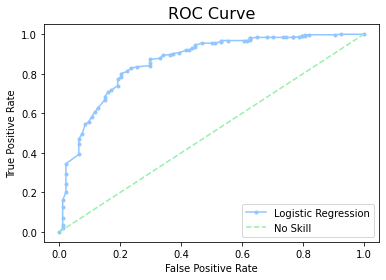

AUC ROC score is : 0.5785174106890908


In [107]:
LG_probs = RF.predict_proba(x_valid)[:,1]
NS_probs = [0 for _ in range(len(y_valid))]
rf_fpr, rf_tpr, _ = roc_curve(y_valid, LG_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_valid, NS_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic Regression')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_valid,y_pred))

# KNN Classification

In [108]:
from  sklearn.neighbors import KNeighborsClassifier
scores = []
recall=[]
for k in range(1,25,2) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_valid)
    scores.append(metrics.recall_score(y_valid,y_pred))
    recall.append(metrics.recall_score(y_valid,y_pred))

Text(0, 0.5, 'Testing Accuracy')

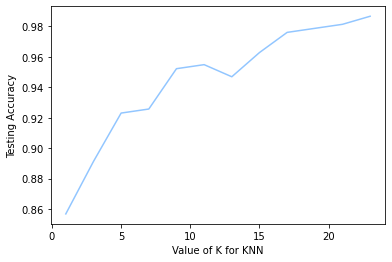

In [109]:
plt.plot(range(1,25,2), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [110]:
print("Confusion Matrix: ")
print(confusion_matrix(y_valid, y_pred)) 
      
print ("Accuracy : ")
print(accuracy_score(y_valid,y_pred)*100) 
      
print("Classification Report : ")
print(classification_report(y_valid, y_pred))

Confusion Matrix: 
[[  6  88]
 [  5 372]]
Accuracy : 
80.2547770700637
Classification Report : 
              precision    recall  f1-score   support

           0       0.55      0.06      0.11        94
           1       0.81      0.99      0.89       377

    accuracy                           0.80       471
   macro avg       0.68      0.53      0.50       471
weighted avg       0.76      0.80      0.73       471



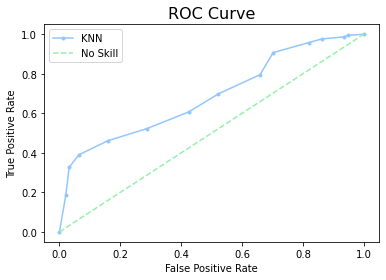

AUC ROC score is : 0.5252835938822733


In [111]:
KNN_probs = knn.predict_proba(x_valid)[:,1]
NS_probs = [0 for _ in range(len(y_valid))]
knn_fpr, knn_tpr, _ = roc_curve(y_valid, KNN_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_valid, NS_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_valid,y_pred))

# Run the Naive Bayes Algorithm

In [112]:
print(np.bincount(target))

[ 315 1255]


In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
# Five-fold cross-validation of the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB as GNB
model = GNB()

scores = cross_val_score(model, x, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.678', '0.764', '0.713', '0.729', '0.783']
Accuracy: 0.734 (+/- 0.074)
Accuracy: 0.734 (+/- 0.037)


In [115]:
from sklearn.naive_bayes import GaussianNB as GNB
model = GNB()

model.fit(x_train, y_train)  #fit the model
y_pred = model.predict(x_valid)
print("Number of mislabeled points out of a total %d points : %d" % (x_valid.shape[0], (y_valid != y_pred).sum()))

Number of mislabeled points out of a total 471 points : 158


In [116]:
from sklearn import metrics

print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_valid, y_pred)) 
      
print ("Accuracy : ")
print(metrics.accuracy_score(y_valid,y_pred)*100) 
      
print("Classification Report : ")
print(metrics.classification_report(y_valid, y_pred))

Confusion Matrix: 
[[ 74  20]
 [138 239]]
Accuracy : 
66.45435244161358
Classification Report : 
              precision    recall  f1-score   support

           0       0.35      0.79      0.48        94
           1       0.92      0.63      0.75       377

    accuracy                           0.66       471
   macro avg       0.64      0.71      0.62       471
weighted avg       0.81      0.66      0.70       471



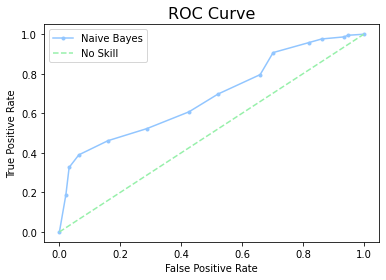

AUC ROC score is : 0.7105931485975507


In [117]:
NB_probs = knn.predict_proba(x_valid)[:,1]
NS_probs = [0 for _ in range(len(y_valid))]
knn_fpr, knn_tpr, _ = roc_curve(y_valid, NB_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_valid, NS_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Naive Bayes')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_valid,y_pred))

In [119]:
# Random Forest seems to be the best model for this case
# Random Forest(85.13) > Decision Tree(84.71) > Logistic Regression(80.46) > KNN(80.24) > Naive Bayes(66.45) 

# References

https://www.mckinsey.com/business-functions/risk/our-insights/the-value-in-digitally-transforming-credit-risk-management
 Business Analytics The Science of Data Driven Decision making By Prof(Dr) U Dinesh Kumar IIMB